## Utilize OSMnx to retrieve street network and point-of-interest data from OpenStreetMap

This code extracts building and road data from OpenStreetMap using the osmnx library and plots the buildings and roads on a map using matplotlib.

First, the necessary libraries are imported: osmnx for accessing OpenStreetMap data and converting it to networkx graphs, geopandas for handling geographic data, pandas for data manipulation, networkx for network analysis, and matplotlib for plotting.

Next, the tags to filter the OpenStreetMap data are defined. In this case, the code is extracting buildings, so the tag is set to {'building':True}.

The center point and distance for extracting the data are then defined. The center point is set to the coordinates (57.1497, -2.0943) and the distance is set to 100 meters.

The code then extracts buildings data from OpenStreetMap using the features_from_point function from osmnx and converts the data to a GeoDataFrame using geopandas. The first few rows of the GeoDataFrame are displayed using the head() function.

The code then extracts roads data from OpenStreetMap using the graph_from_point function from osmnx and converts the data to a GeoDataFrame using osmnx. The first few rows of the GeoDataFrame are displayed using the head() function.

The code plots the buildings and roads data on a map using matplotlib. The buildings are plotted in the original color and the roads are plotted in red. The plot is displayed using the show() function.  

Finally, the two datasets are saved as geojson files


In [1]:
# Import necessary libraries
# osmnx is used for accessing OpenStreetMap data and converting it to networkx graphs
# geopandas is used for handling geographic data
# pandas is used for data manipulation
# networkx is used for network analysis
# matplotlib is used for plotting

import osmnx as ox
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define the tags to filter the OpenStreetMap data
tags = tags={'building':True}

In [3]:

# Define the center point and distance for extracting the data
center_point = (57.179249,-2.132190)
# and the extent of the area
dist = 200

In [4]:
# Extract buildings data from OpenStreetMap
buildings = ox.features_from_point(center_point, tags, dist)

# Convert the buildings data to a GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings, geometry='geometry')

In [5]:
# Display the first few rows of the GeoDataFrame
buildings_gdf.head()

geometry  \
element id                                                             
way     965071693  POLYGON ((-2.13257 57.18054, -2.13262 57.1806,...   
        965071694  POLYGON ((-2.13257 57.18054, -2.13238 57.18058...   
        965071695  POLYGON ((-2.13322 57.18055, -2.13322 57.1805,...   
        965071696  POLYGON ((-2.13322 57.18055, -2.13304 57.18055...   
        965071697  POLYGON ((-2.13287 57.18068, -2.13277 57.18072...   

                  addr:city addr:postcode     addr:street            building  \
element id                                                                      
way     965071693  Aberdeen      AB22 8ZU  Fairview Drive  semidetached_house   
        965071694  Aberdeen      AB22 8ZU  Fairview Drive  semidetached_house   
        965071695  Aberdeen      AB22 8ZU  Fairview Drive  semidetached_house   
        965071696  Aberdeen      AB22 8ZU  Fairview Drive  semidetached_house   
        965071697  Aberdeen      AB22 8ZU  Fairview Drive  semidetached_house   

                  building:levels roof:levels roof:shape addr:country  \
element id                                                              
way     965071693               1           1     gabled          NaN   
        965071694               1           1     gabled          NaN   
        965071695               1         NaN     gabled          NaN   
        965071696               1         NaN     gabled          NaN   
        965071697               1           1     gabled          NaN   

                  addr:housenumber  
element id                          
way     965071693              NaN  
        965071694              NaN  
        965071695              NaN  
        965071696              NaN  
        965071697              NaN

In [6]:
# Extract roads data from OpenStreetMap
roads = ox.graph_from_point(center_point=center_point,dist=dist, network_type='all')

In [7]:
# Convert the roads data to a GeoDataFrame
roads_gdf = ox.graph_to_gdfs(roads, nodes=False)

In [8]:
# Display the first few rows of the GeoDataFrame
roads_gdf.head()

osmid      highway lanes maxspeed           name  \
u        v          key                                                         
51956956 51960911   0    904856131  residential     2   30 mph   Laurel Drive   
         51958551   0    904856131  residential     2   30 mph   Laurel Drive   
51958244 4866275583 0    905131796  residential     2   30 mph   Laurel Drive   
         51959271   0      6227344  residential   NaN   30 mph  Fairview Brae   
         51960911   0    905131796  residential     2   30 mph   Laurel Drive   

                         oneway reversed      length  \
u        v          key                                
51956956 51960911   0     False    False    3.716535   
         51958551   0     False     True   53.505592   
51958244 4866275583 0     False    False   22.984928   
         51959271   0     False    False   70.083551   
         51960911   0     False     True  210.366171   

                                                                  geometry  \
u        v          key                                                      
51956956 51960911   0     LINESTRING (-2.13024 57.1802, -2.13029 57.18019)   
         51958551   0     LINESTRING (-2.13024 57.1802, -2.12939 57.18035)   
51958244 4866275583 0    LINESTRING (-2.13348 57.17942, -2.13382 57.17933)   
         51959271   0    LINESTRING (-2.13348 57.17942, -2.1335 57.1794...   
         51960911   0    LINESTRING (-2.13348 57.17942, -2.13285 57.179...   

                        service width  
u        v          key                
51956956 51960911   0       NaN   NaN  
         51958551   0       NaN   NaN  
51958244 4866275583 0       NaN   NaN  
         51959271   0       NaN   NaN  
         51960911   0       NaN   NaN

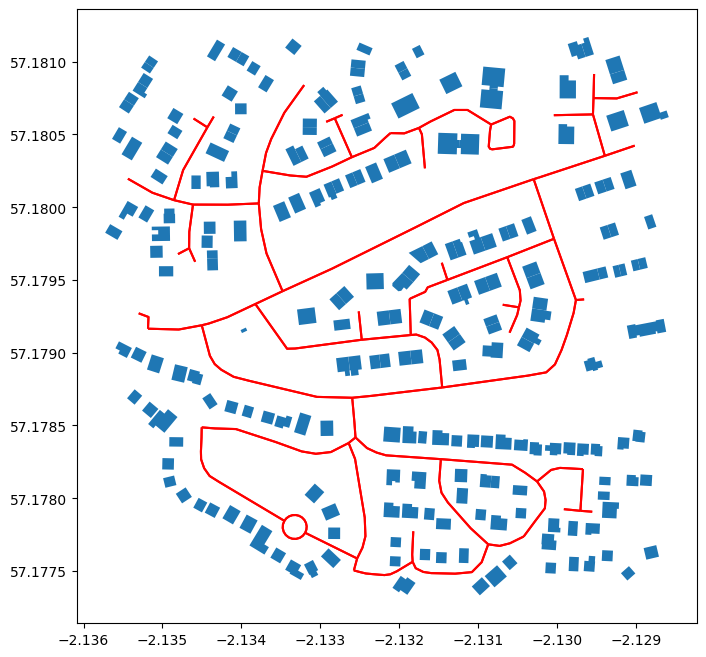

In [9]:
# Plot the buildings and roads data
fig, ax = plt.subplots(figsize=(8, 8))
buildings_gdf.plot(ax=ax)
roads_gdf.plot(ax=ax,color='red')
plt.show()


In [10]:
# Save the GeoDataFrame as GeoJSON
buildings_gdf.to_file("buildings.geojson", driver="GeoJSON")
roads_gdf.to_file("roads.geojson", driver="GeoJSON")